In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as numpy
import glob, os
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [35]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [36]:
%%bash
cp /Users/nwolfe/git/neural-network/*.csv .

In [37]:
csv_files = ['drshape.network.acc96.dnn.ranking-result.csv']
with open(csv_files[0], 'r') as dest_f:
    data_iter = csv.reader(dest_f, 
                           delimiter = ',', 
                           quotechar = '"')
    data = [data for data in data_iter]
    data_array = numpy.asarray(data, dtype=numpy.float32)

In [38]:
data_array.shape

(100, 3)

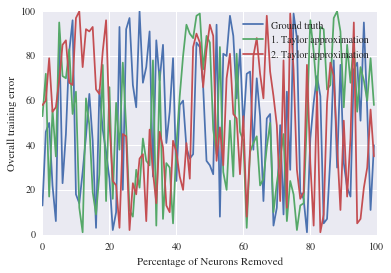

In [39]:
legend_list = [
    r'Ground truth',
    r'1. Taylor approximation',
    r'2. Taylor approximation'
]
for i in [0, 1, 2]:
    plt.plot(data_array[:, i])
    plt.xlabel('Percentage of Neurons Removed')
    plt.ylabel('Overall training error')
    plt.ylim((0, 100))

plt.legend(legend_list)
# plt.savefig('greedy_algo_comparison.pdf'.format(i+1), bbox_inches='tight', pad_inches=-0.000005)
plt.show()

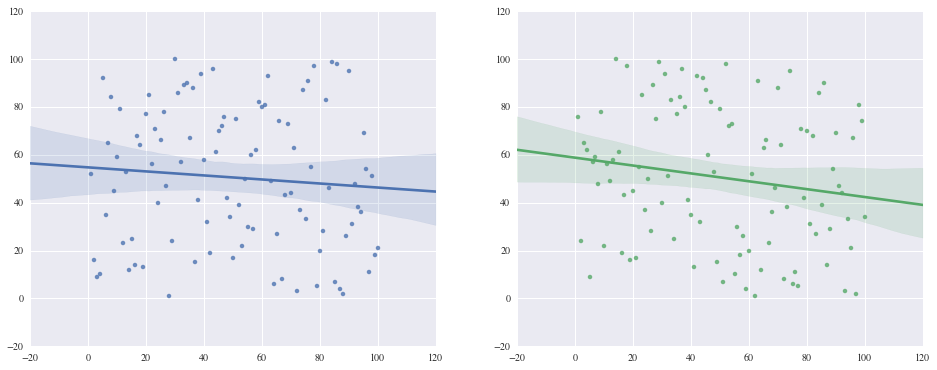

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.regplot(x=data_array[:, 0], y=data_array[:, 1], ax=ax1);
sns.regplot(x=data_array[:, 0], y=data_array[:, 2], ax=ax2);
plt.show()

In [41]:
def make_graph(name, scale=None, export=True):
    print(name)
    with open(name, 'r') as dest_f:
        data_iter = csv.reader(dest_f, 
                               delimiter = ',', 
                               quotechar = '"')
        data = [data for data in data_iter]
    data_array = numpy.asarray(data, dtype=numpy.float32)
    legend_list = [
        r'Ground truth',
        r'1st derivative approximation',
        r'2nd derivative approximation'
    ]
    for i in [0, 1, 2]:
        plt.plot(data_array[:, i])

    if scale is not None:
        plt.ylim((0, scale))
    plt.xlabel('Percentage of Neurons Removed')
    plt.ylabel('Sum of Squared Errors')
    plt.legend(legend_list)
    if export:
        plt.savefig('plot.'+name+'.pdf'.format(i+1), bbox_inches='tight', pad_inches=0.05)
    plt.show()

In [42]:
%%bash
cp /Users/nwolfe/git/neural-network/*.csv .

circle.network.dnn.accuracy-dropoff-comparison.csv


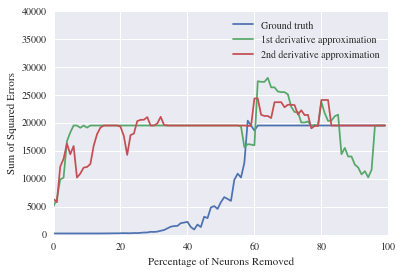

circle.network.dnn.greedy-algo-comparison.csv


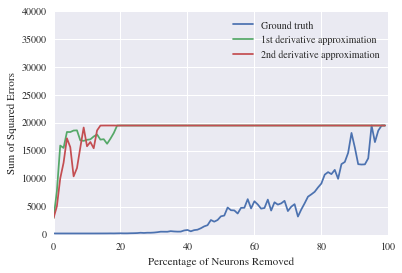

In [43]:
make_graph('circle.network.dnn.accuracy-dropoff-comparison.csv',40000)
make_graph('circle.network.dnn.greedy-algo-comparison.csv',40000)

rshape.network.dnn.accuracy-dropoff-comparison.csv


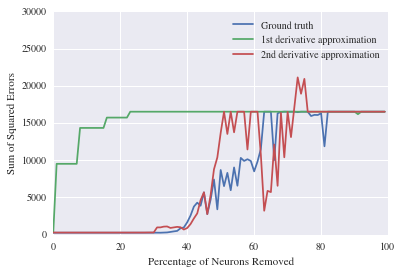

rshape.network.dnn.greedy-algo-comparison.csv


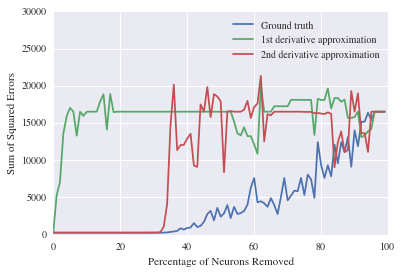

In [44]:
make_graph('rshape.network.dnn.accuracy-dropoff-comparison.csv',30000)
make_graph('rshape.network.dnn.greedy-algo-comparison.csv',30000)

diamond.network.dnn.accuracy-dropoff-comparison.csv


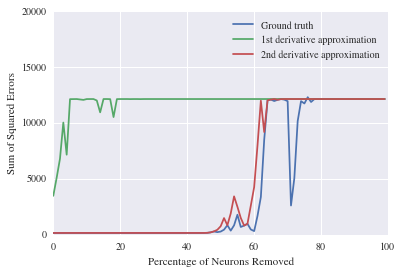

diamond.network.dnn.greedy-algo-comparison.csv


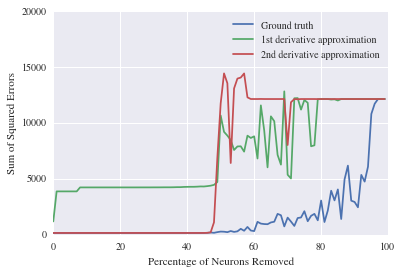

In [45]:
make_graph('diamond.network.dnn.accuracy-dropoff-comparison.csv',20000)
make_graph('diamond.network.dnn.greedy-algo-comparison.csv',20000)

drshape.network.dnn.accuracy-dropoff-comparison.csv


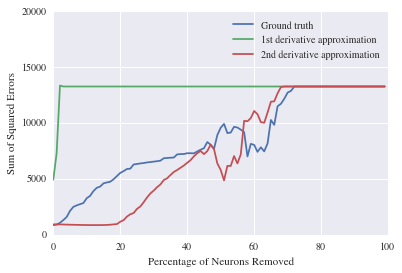

drshape.network.dnn.greedy-algo-comparison.csv


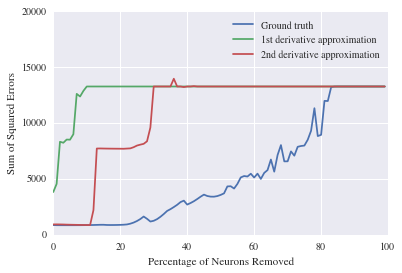

In [46]:
make_graph('drshape.network.dnn.accuracy-dropoff-comparison.csv',20000)
make_graph('drshape.network.dnn.greedy-algo-comparison.csv',20000)

# Further ideas
- To raise confidence in the first and second derivative, a numeric implementation using the quotient of differences may be used.

\begin{align}
\frac{f}{x}
\end{align}

In [47]:
%%bash
cp /Users/nwolfe/git/neural-network/*.csv .

In [48]:
def copy_files():
    os.system("cp /Users/nwolfe/git/neural-network/*.csv .") 

In [49]:
#files = [file for file in glob.glob("xor.*.csv")]
# for f in files:
#     print(f)
#     make_graph(f)

cos.network.dnn.accuracy-dropoff-comparison.csv


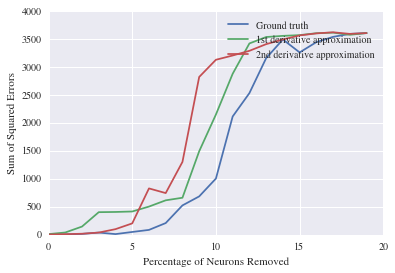

cos.network.dnn.greedy-algo-comparison.csv


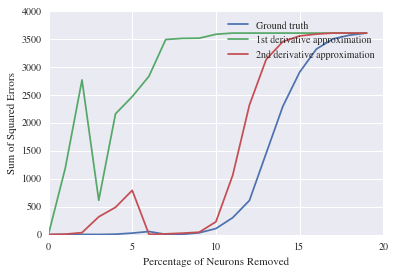

In [50]:
# files = ['mod.cos.network.dnn.accuracy-dropoff-comparison.csv','mod.cos.network.dnn.greedy-algo-comparison.csv']
files = ['cos.network.dnn.accuracy-dropoff-comparison.csv','cos.network.dnn.greedy-algo-comparison.csv']
copy_files()
for f in files:
    make_graph(f,export=True)

cos.big.network.dnn.accuracy-dropoff-comparison.csv


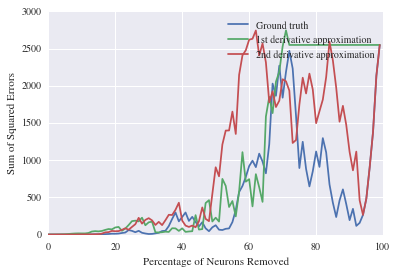

cos.big.network.dnn.greedy-algo-comparison.csv


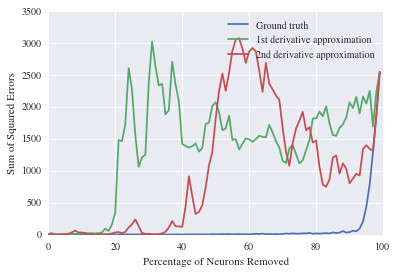

In [51]:
files = ['cos.big.network.dnn.accuracy-dropoff-comparison.csv','cos.big.network.dnn.greedy-algo-comparison.csv']
copy_files()
for f in files:
    make_graph(f,export=True)

xor.network.dnn.accuracy-dropoff-comparison.csv


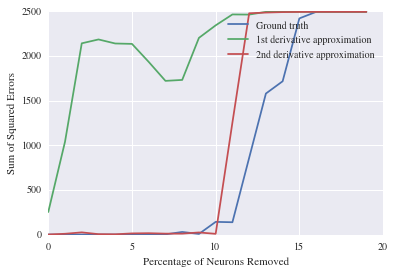

xor.network.dnn.greedy-algo-comparison.csv


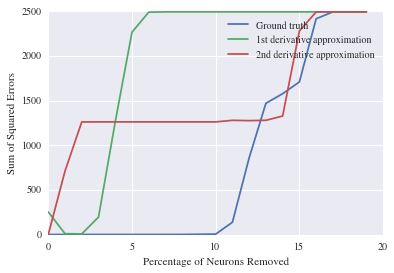

In [52]:
# files = ['mod.xor.network.dnn.accuracy-dropoff-comparison.csv','mod.xor.network.dnn.greedy-algo-comparison.csv']
files = ['xor.network.dnn.accuracy-dropoff-comparison.csv','xor.network.dnn.greedy-algo-comparison.csv']
copy_files()
for f in files:
    make_graph(f,export=True)

xor.big.network.dnn.accuracy-dropoff-comparison.csv


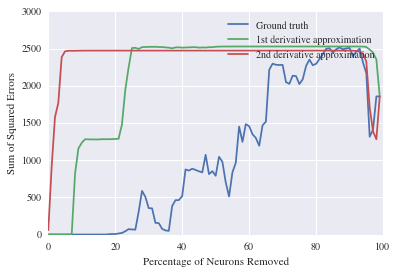

xor.big.network.dnn.greedy-algo-comparison.csv


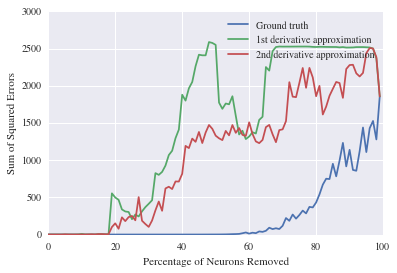

In [53]:
files = ['xor.big.network.dnn.accuracy-dropoff-comparison.csv','xor.big.network.dnn.greedy-algo-comparison.csv']
for f in files:
    make_graph(f, export=True)